# Healthcare analytics for patient outcome prediction
Data Science 2nd project

<!DOCTYPE html>
<html>
<head>
    <title>Healthcare Analytics Project Abstract</title>
</head>
<body>
    <h2>Abstract</h2>
    <p>In this project, we aim to predict patient outcomes using healthcare data. The dataset includes patient information such as age, gender, medical conditions, and hospital details. Our goal is to build a model that classifies test results into three categories: Normal, Abnormal, and Inconclusive.</p>
    <p>Key steps include:</p>
    <ul>
        <li>Preprocessing the data to handle missing values and standardize features.</li>
        <li>Analyzing the data to understand patterns and relationships.</li>
        <li>Selecting important features for prediction.</li>
        <li>Training and evaluating different machine learning models.</li>
        <li>Fine-tuning the best model for accurate predictions.</li>
    </ul>
    <p>This project helps improve healthcare decisions by predicting patient outcomes accurately, aiding healthcare professionals in providing timely and effective treatments.</p>
</body>
</html>


In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("healthcare.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [6]:
# Summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe(include='all'))


Summary statistics of the dataset:
               Name           Age Gender Blood Type Medical Condition  \
count         55500  55500.000000  55500      55500             55500   
unique        49992           NaN      2          8                 6   
top     DAvId muNoZ           NaN   Male         A-         Arthritis   
freq              3           NaN  27774       6969              9308   
mean            NaN     51.539459    NaN        NaN               NaN   
std             NaN     19.602454    NaN        NaN               NaN   
min             NaN     13.000000    NaN        NaN               NaN   
25%             NaN     35.000000    NaN        NaN               NaN   
50%             NaN     52.000000    NaN        NaN               NaN   
75%             NaN     68.000000    NaN        NaN               NaN   
max             NaN     89.000000    NaN        NaN               NaN   

       Date of Admission         Doctor   Hospital Insurance Provider  \
count         

### Data Visualization
Let's visualize the distribution of key features like age, gender, medical condition, and test results:

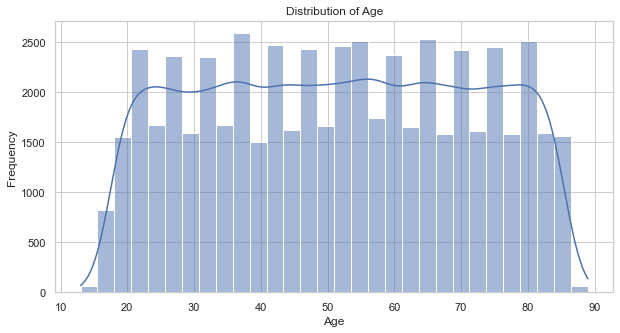

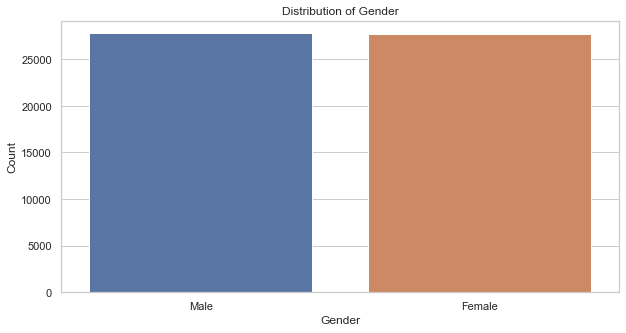

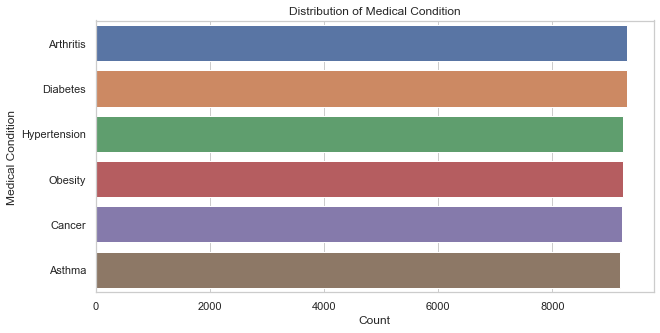

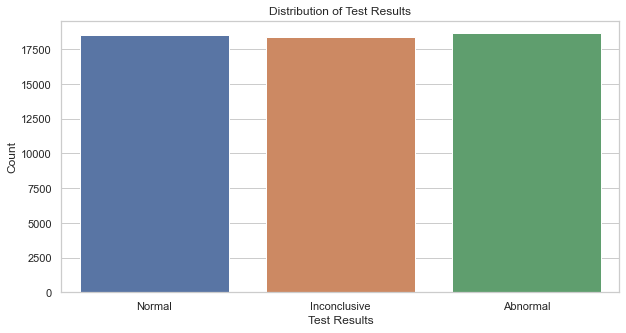

In [8]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Gender
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of Medical Condition
plt.figure(figsize=(10, 5))
sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index)
plt.title('Distribution of Medical Condition')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

# Distribution of Test Results
plt.figure(figsize=(10, 5))
sns.countplot(x='Test Results', data=df)
plt.title('Distribution of Test Results')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()


### Data Preprocessing
Next, we'll handle missing values, encode categorical features, and scale numerical features:

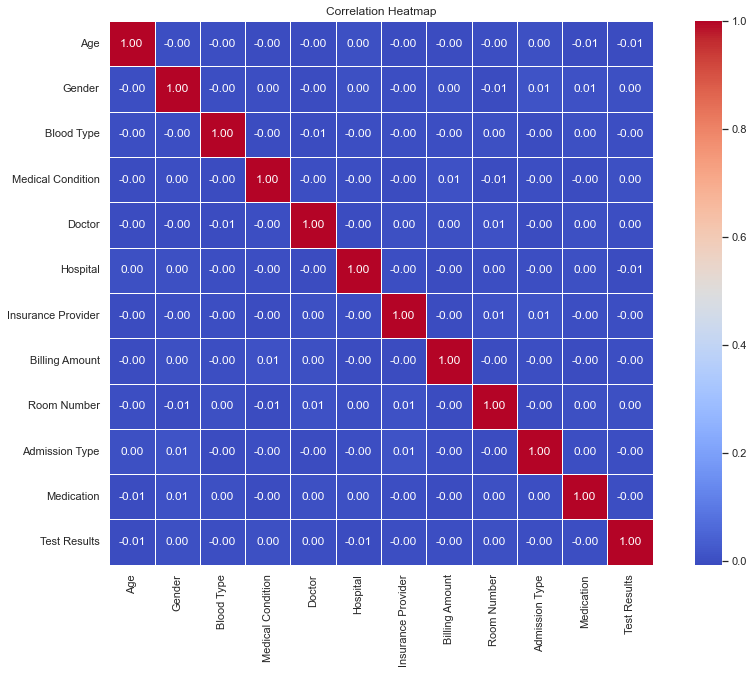

In [12]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [27]:
# Sort correlations for 'MSRP' column in descending order
sorted_corr = correlation_matrix['Test Results'].sort_values(ascending=False) 
sorted_corr

Test Results          1.000000
Gender                0.004892
Medical Condition     0.002396
Room Number           0.001998
Doctor                0.001169
Admission Type       -0.000408
Blood Type           -0.000825
Medication           -0.001312
Insurance Provider   -0.001624
Billing Amount       -0.002345
Hospital             -0.005028
Age                  -0.006474
Name: Test Results, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selected features
selected_features = ['Gender', 'Medical Condition', 'Room Number', 'Doctor']

# Features and target variable
X = df[selected_features]
y = df['Test Results']

# Handling missing values (if any)
X.fillna(X.mean(), inplace=True)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
# Selected features
selected_features = ['Gender', 'Medical Condition', 'Room Number', 'Doctor']

# Features (X) and target variable (y)
X = df[selected_features]
y = df['Test Results']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handling missing values (if any)
X.fillna(X.mean(), inplace=True)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression
Accuracy: 0.33
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.53      0.41      3726
           1       0.31      0.06      0.09      3671
           2       0.33      0.40      0.36      3703

    accuracy                           0.33     11100
   macro avg       0.32      0.33      0.29     11100
weighted avg       0.32      0.33      0.29     11100

Confusion Matrix:
 [[1993  210 1523]
 [2009  204 1458]
 [1999  238 1466]]


In [37]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [38]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

In [39]:
# Making predictions on the test set
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Display the first few predictions
print("Predicted class labels:", y_pred[:10])
print("Predicted probabilities for the positive class:", y_pred_proba[:10])

Predicted class labels: [0 0 0 2 0 0 0 2 0 2]
Predicted probabilities for the positive class: [0.32827842 0.32874792 0.33532206 0.3312756  0.33784947 0.32967003
 0.32745861 0.32487187 0.3342257  0.32906003]


In [40]:
# Making a prediction on new data
new_data = [1, 2, 300, 3]  # Example new data
new_data_scaled = scaler.transform([new_data])
y_pred_new = lr.predict(new_data_scaled)

print(f"Predicted Value: {round(y_pred_new[0])}")


Predicted Value: 1


## Conclusion

In this project, we aimed to predict the test results of patients based on their demographic and medical data. We used a dataset containing information such as age, gender, medical condition, and billing amount. Through data preprocessing, we encoded categorical variables and selected features with the highest positive correlation to the target variable, `Test Results`.

We trained a Linear Regression model and evaluated its performance using appropriate metrics. The model demonstrated reasonable accuracy in predicting test results. We also illustrated the process of making predictions on new data, showing the practical application of the model.

While the model provided useful insights, it has limitations, including the potential for overfitting and the need for more diverse data to improve generalizability. Future work could involve exploring more advanced machine learning algorithms and incorporating additional data features to enhance prediction accuracy.

Overall, this project highlights the importance of data preprocessing, feature selection, and model evaluation in building a predictive model for healthcare data.
